<a href="https://colab.research.google.com/github/almachn/dicoding-bycicle-analisist/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alma Choerunisa
- **Email:** mc367d5x0927@student.devacademy.id
- **ID Dicoding:** MC367D5X0927

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan?
2. Pada jam berapa penggunaan sepeda paling tinggi di hari kerja dibanding akhir pekan?
4. Bagaimana intensitas dan waktu penggunaan sepeda berbeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [316]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [317]:
day_df = pd.read_csv("/content/drive/MyDrive/submission-bike-sharing-dataset-almach/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Dataset ini merupakan data penyewaan sepeda dalam skala harian. Total ada 17 kolom di setiap baris data, yang masing-masing memberi info tentang kondisi hari tersebut dan jumlah peminjaman sepeda.

- instant: Nomor urut data.
- dteday: Tanggal.
- season: Musim saat data dicatat (1 = semi, 2 = panas, 3 = gugur, 4 = dingin).
- yr: Tahun (0 = 2011, 1 = 2012).
- mnth: Bulan (1 sampai 12).
- holiday: Apakah hari libur nasional? (1 = ya, 0 = tidak).
- weekday: Hari dalam seminggu (0 = Minggu, 6 = Sabtu).
- workingday: Apakah hari kerja (bukan weekend atau libur)? (1 = ya, 0 = tidak).
- weathersit: Kondisi cuaca (semakin besar angkanya, semakin buruk cuacanya).
- temp: Suhu normalisasi (antara 0 dan 1).
- atemp: Suhu yang dirasakan.
- hum: Kelembapan.
- windspeed: Kecepatan angin.
- casual: Jumlah peminjam casual (pengguna tidak terdaftar).
- registered: Jumlah peminjam registered (pengguna terdaftar).
- cnt: Total peminjaman sepeda (casual + registered).


In [318]:
hour_df = pd.read_csv("/content/drive/MyDrive/submission-bike-sharing-dataset-almach/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Dataset kedua merupakan versi yang lebih rinci, karena mencatat peminjaman per jam. Total ada 18 kolom di sini—semua kolom dari dataset harian tadi, ditambah satu tambahan penting, yaitu hr.
- hr: Jam (0 sampai 23).

### Assessing Data

In [319]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

Dataset terdiri dari 731 entri dan 16 kolom, mencakup data harian yang berhubungan dengan penggunaan sepeda, kondisi cuaca, dan faktor kalender.
- Jumlah total data: 731 baris
- Jumlah kolom: 16 kolom
- Tidak ditemukan nilai yang kosong atau hilang pada semua kolom.
- Data mencakup dua tahun (2011–2012)
- Ukuran memori: ~91.5 KB

Tipe Data
- Numerik Integer (int64): 11 kolom
- Numerik Desimal (float64): 4 kolom
- Objek (Tanggal) (object): 1 kolom (dteday)
---
**Kesalahan:**
1. Dataset lengkap tanpa missing value, sehingga tidak memerlukan imputasi awal.
2. Kolom dteday perlu dikonversi ke format datetime untuk mempermudah analisis berbasis waktu.
3. Variabel target yang biasa digunakan untuk analisis prediktif adalah kolom cnt.


In [320]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

Dataset mencakup 731 entri.

- **Waktu dan Identitas**  
  Kolom instant menunjukkan urutan data dari 1 hingga 731, dengan rata-rata berada di tengah yaitu 366.

- **Musim dan Waktu Kalender**  
  Nilai season berkisar dari 1 (spring) hingga 4 (winter), dengan nilai rata-rata sekitar 2.5. Kolom yr memiliki nilai 0 dan 1 yang merepresentasikan tahun 2011 dan 2012 secara berurutan. Kolom mnth (bulan) bervariasi dari 1 hingga 12, dengan rata-rata sekitar bulan ke-6 (Juni).

- **Hari Libur dan Hari Kerja**  
  Kolom holiday sebagian besar bernilai 0 (bukan hari libur), karena rata-rata hanya 0.0287. Artinya, hanya sekitar 2.87% dari data yang merupakan hari libur. Sedangkan workingday menunjukkan bahwa sekitar 68.4% hari dalam dataset adalah hari kerja.

- **Hari dalam Minggu dan Kondisi Cuaca**  
  Rata-rata nilai weekday 2.99, mendekati hari Rabu (nilai 3), dengan rentang dari 0 (Minggu) hingga 6 (Sabtu). Pada kondisi cuaca (weathersit), nilai rata-ratanya 1.39 yang mendekati kondisi cuaca paling cerah (kategori 1), dengan maksimum pada kategori 3 (kondisi cuaca terburuk dalam dataset).

- **Kondisi Lingkungan**  
  Suhu (temp) berkisar antara 0.059 hingga 0.861 dengan rata-rata 0.495. Suhu yang dirasakan (atemp) sedikit lebih rendah dengan rata-rata 0.474. Kelembapan (hum) cukup tinggi, rata-rata di angka 0.628. Kecepatan angin (windspeed) rata-rata berada di 0.19.

- **Jumlah Pengguna Sepeda**  
  Jumlah pengguna kasual (casual) memiliki rata-rata sekitar 848. Pengguna terdaftar (registered), rata-ratanya jauh lebih tinggi yaitu 3.656. Secara keseluruhan, total jumlah pengguna (cnt) berkisar dari 22 hingga 8.714 per hari, dengan rata-rata sekitar 4.504 pengguna sepeda per hari.

---

**Kesalahan atau Potensi Anomali**

**1. Kolom Hum**
- **Minimum = 0.000**
- **Maksimum = 0.9725**

Dalam kondisi cuaca normal, kelembapan relatif hampir tidak pernah sampai pada angka nol.

**2. Kolom Casual dan Registered**
- **Minimum casual = 2**, **registered = 20**, tapi **total cnt minimum = 22**

Total minimum pengguna sepeda harian sangat rendah, hanya 22. Hal ini mungkin tidak salah, bisa jadi hari tersebut memiliki kondisi cuaca ekstrem atau merupakan hari libur besar. Sebaiknya ditelusuri lebih lanjut dengan melihat weathersit, holiday, atau dteday.

 **3. Kolom windspeed**
- **Minimum = 0.022**, **Maksimum = 0.507**

Walaupun tidak terlihat anomali besar di sini, dan nilai-nilai rendah mendekati nol bisa jadi mencerminkan cuaca yang sangat tenang, hal ini seharusnya tetap ditelusuri lebih lanjut.




In [321]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**

Tidak *missing value* pada data ini.

In [322]:
day_df.duplicated().sum()

np.int64(0)

**Insight:**

Tidak ada duplikat pada data ini.

In [323]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Dataset ini terdiri dari 17.379 baris dan 17 kolom. Data lengkap, tidak nilai yang hilang.

- Total entri: 17.379 baris
- Jumlah fitur (kolom): 17 kolom
- Penggunaan memori: Sekitar 2.3 MB

**Tipe data:**
- Integer (int64): 12 kolom
- Float (float64): 4 kolom
- Object (object): 1 kolom (dteday, yang berisi tanggal)

---
**Kesalahan:**

Kolom dteday perlu dikonversi ke format waktu untuk analisis berbasis tanggal dan waktu.

In [324]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Dataset terdiri dari 17.379 entri

**Nilai Rata-rata (Mean):**
- Jam (hr): 11.55  
- Suhu (temp): 0.497  
- Suhu yang dirasakan (atemp): 0.476  
- Kelembapan (hum): 0.627  
- Kecepatan angin (windspeed): 0.190  
- Jumlah peminjam kasual (casual): 35.68  
- Jumlah peminjam terdaftar (registered): 153.79  
- Jumlah total peminjam (cnt): 189.46  


**Nilai Minimum dan Maksimum:**
- Temp: dari 0.020 hingga 1.000  
- Atemp: dari 0.000 hingga 1.000  
- Hum: dari 0.000 hingga 1.000  
- Windspeed: dari 0.000 hingga 0.851  
- Casual: dari 0 hingga 367  
- Registered: dari 0 hingga 886  
- Jumlah total peminjam: dari 1 hingga 977  

**Potensi Anomali:**
- **Kelembapan (hum)** dan **kecepatan angin (windspeed)** memiliki nilai minimum **0**, yang secara fisik mungkin tidak realistis, dan merupakan tanda pencatatan yang hilang atau salah.
- **Jumlah peminjam kasual dan terdaftar** memiliki nilai minimum 0, menandakan pada beberapa jam tidak ada peminjaman sama sekali. Bisa jadi valid, tetapi perlu divalidasi lebih lanjut.
- **Jumlah total peminjam (cnt)** memiliki nilai minimum 1, yang bisa menjadi anomali kecil karena seharusnya bisa saja ada waktu tanpa peminjaman sama sekali.

In [325]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
Tidak ada *missing value* pada data ini.

In [326]:
hour_df.duplicated().sum()

np.int64(0)

**Insight:**

Tidak ada duplikat pada data ini.

### Cleaning Data

In [327]:
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit": "weather",
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [328]:
day_df['date'] = pd.to_datetime(day_df['date'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [329]:
# Mapping untuk year
year_mapping = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(year_mapping)

# Mapping untuk season
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day_df['season'] = day_df['season'].map(season_mapping)

# Mapping untuk month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['month'] = day_df['month'].map(month_mapping)

# Mapping untuk weather (hanya 1, 2, 3 yang ada)
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain'
}
day_df['weather'] = day_df['weather'].map(weather_mapping)

# Mapping untuk holiday
holiday_mapping = {0: 'No', 1: 'Yes'}
day_df['holiday'] = day_df['holiday'].map(holiday_mapping)

# Mapping untuk weekday (0 = Sunday, 6 = Saturday, atau sebaliknya tergantung dataset)
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

# Mapping untuk workingday
workingday_mapping = {0: 'Holiday', 1: 'Working Day'}
day_df['workingday'] = day_df['workingday'].map(workingday_mapping)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,Holiday,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sunday,Holiday,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Monday,Working Day,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tuesday,Working Day,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wednesday,Working Day,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [330]:
kategori_cols = ['year', 'season', 'month', 'weather', 'holiday', 'weekday', 'workingday']
day_df[kategori_cols] = day_df[kategori_cols].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Cleaning Data Hour

In [331]:
hour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit": "weather",
}, inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [332]:
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [333]:
# Mapping untuk year
year_mapping = {0: 2011, 1: 2012}
hour_df['year'] = hour_df['year'].map(year_mapping)

# Mapping untuk season
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
hour_df['season'] = hour_df['season'].map(season_mapping)

# Mapping untuk month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
}
hour_df['month'] = hour_df['month'].map(month_mapping)

# Mapping untuk weather
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain'
}
hour_df['weather'] = hour_df['weather'].map(weather_mapping)

# Mapping untuk holiday
holiday_mapping = {0: 'No', 1: 'Yes'}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)

# Mapping untuk weekday
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

# Mapping untuk workingday
workingday_mapping = {0: 'Holiday', 1: 'Working Day'}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,No,Saturday,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Saturday,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Saturday,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Saturday,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Saturday,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [334]:
kategori_cols = ['year', 'season', 'month', 'weather', 'holiday', 'weekday', 'workingday']
hour_df[kategori_cols] = hour_df[kategori_cols].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17376 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

- Perubahan nama dilakukan pada beberapa kolom menggunakan fungsi '.rename' untuk mempermudah pembacaan data tersebut.
- Kolom date diubah ke tipe datetime agar Python dapat mengenalinya sebagai data waktu. Hal ini penting untuk mempermudah proses analisis berbasis tanggal.
- Beberapa kolom pada dataset memiliki nilai numerik yang merepresentasikan kategori, seperti season, year, month, weather, dan lainnya. Untuk meningkatkan kemudahan dalam membaca dan melakukan analisis, nilai-nilai tersebut di-mapping ke dalam label teks yang lebih bermakna.
- Kolom-kolom seperti year, season, month, dan sejenisnya berisi data yang bersifat kategorikal, bukan numerik kontinu. Oleh karena itu, kolom-kolom ini dikonversi ke tipe data category agar penggunaan memori lebih efisien dan proses analisis menjadi lebih tepat.

## Exploratory Data Analysis (EDA)

### Pertanyaan 1: Bagaimana perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan?
    



In [335]:
# Ringkasan statistik keseluruhan
print("\nStatistik deskriptif keseluruhan:")
print(day_df["cnt"].describe())


Statistik deskriptif keseluruhan:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


In [336]:
day_df['day_type'] = day_df['workingday'].apply(lambda x: 'Working Day' if x == 'Working Day' else 'Weekend/Holiday')

In [337]:
# Agregasi
day_type_stats = day_df.groupby('day_type').agg(
    total_sum=('cnt', 'sum'),
    total_max=('cnt', 'max'),
    total_min=('cnt', 'min'),
    total_mean=('cnt', 'mean'),
    count_days=('cnt', 'count')
).reset_index()

display(day_type_stats)

<ipython-input-337-b10861fc18e8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_type_stats = day_df.groupby('day_type').agg(


,day_type,total_sum,total_max,total_min,total_mean,count_days
0,Weekend/Holiday,1000269,8714,605,4330.168831,231
1,Working Day,2292410,8362,22,4584.820000,500


**Insight:**

- Selama periode observasi, tercatat sebanyak 1.000.269 peminjaman sepeda terjadi pada hari libur dan akhir pekan (Weekend/Holiday), sedangkan 2.292.410 peminjaman tercatat pada hari kerja (Working Day).
- Rata-rata peminjaman per hari pada hari kerja sedikit lebih tinggi, yaitu sekitar 4.585 sepeda/hari, dibandingkan dengan 4.330 sepeda/hari pada akhir pekan.
- Meskipun perbedaannya tidak terlalu mencolok, hal ini menunjukan bahwa sepeda digunakan secara aktif baik untuk transportasi rutin, seperti berangkat kerja/sekolah, maupun untuk rekreasi di akhir pekan.
- Grafik tren menunjukan bahwa volume peminjaman cenderung lebih konsisten pada hari kerja, sementara pada hari libur, fluktuasi jumlah peminjaman sedikit lebih besar, bisa jadi dipengaruhi oleh cuaca, event, atau musim liburan tertentu.
- Hal menarik lainnya: nilai maksimum harian justru muncul saat Weekend/Holiday dengan 8714 peminjaman, menunjukkan bahwa ada hari libur tertentu yang sangat tinggi intensitas peminjamannya, bisa jadi hari besar nasional atau long weekend yang menggerakan masyarakat untuk bersepeda bersama.

### 2. Pada jam berapa penggunaan sepeda paling tinggi di hari kerja dibanding akhir pekan?

In [338]:
hour_df['day_type'] = hour_df['workingday'].apply(
    lambda x: 'Working Day' if x == 'Working Day' else 'Weekend/Holiday'
)

hourly_usage = hour_df.groupby(['hour', 'day_type'])['cnt'].mean().reset_index()
display(hourly_usage)

<ipython-input-338-d3f556f6fb95>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_usage = hour_df.groupby(['hour', 'day_type'])['cnt'].mean().reset_index()


,hour,day_type,cnt
0,0,Weekend/Holiday,90.800000
1,0,Working Day,36.786290
2,1,Weekend/Holiday,69.508696
3,1,Working Day,16.552632
4,2,Weekend/Holiday,53.171053
5,2,Working Day,8.683778
6,3,Weekend/Holiday,25.775330
7,3,Working Day,4.942553
8,4,Weekend/Holiday,8.264317
9,4,Working Day,5.429787


In [339]:
# Mengelompokkan rata-rata peminjaman per jam dan tipe hari
hourly_usage = hour_df.groupby(['hour', 'day_type'])['cnt'].mean().reset_index()

# Mendapatkan jam dengan rata-rata tertinggi per tipe hari
peak_hour = hourly_usage.loc[hourly_usage.groupby('day_type')['cnt'].idxmax()]
print("Jam dengan rata-rata penggunaan tertinggi per day_type:")
print(peak_hour)

# Working Day: ambil jam 8 dan 17
workingday_usage = hourly_usage[hourly_usage['day_type'] == 'Working Day']
peak_morning = workingday_usage[workingday_usage['hour'] == 8]
peak_evening = workingday_usage[workingday_usage['hour'] == 17]

print("\nWorking Day:")
print(f"• Jam 08:00 → {peak_morning['cnt'].values[0]:.0f} pengguna/jam")
print(f"• Jam 17:00 → {peak_evening['cnt'].values[0]:.0f} pengguna/jam")

# Weekend/Holiday: ambil jam 13
weekend_usage = hourly_usage[hourly_usage['day_type'] == 'Weekend/Holiday']
peak_midday = weekend_usage[weekend_usage['hour'] == 13]

print("\nWeekend/Holiday:")
print(f"• Jam 13:00 → {peak_midday['cnt'].values[0]:.0f} pengguna/jam")

# Rata-rata penggunaan sepanjang hari per tipe hari
mean_usage = hourly_usage.groupby('day_type')['cnt'].mean().reset_index()
print("\nRata-rata penggunaan sepeda per jam:")
display(mean_usage)

Jam dengan rata-rata penggunaan tertinggi per day_type:
    hour         day_type         cnt
26    13  Weekend/Holiday  372.731602
35    17      Working Day  525.290581

Working Day:
• Jam 08:00 → 477 pengguna/jam
• Jam 17:00 → 525 pengguna/jam

Weekend/Holiday:
• Jam 13:00 → 373 pengguna/jam

Rata-rata penggunaan sepeda per jam:


<ipython-input-339-667a8fec720c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_usage = hour_df.groupby(['hour', 'day_type'])['cnt'].mean().reset_index()
<ipython-input-339-667a8fec720c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_hour = hourly_usage.loc[hourly_usage.groupby('day_type')['cnt'].idxmax()]
<ipython-input-339-667a8fec720c>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_usage = hour

,day_type,cnt
0,Weekend/Holiday,180.712877
1,Working Day,192.035086


**Inisght:**

1. Hari Kerja (Working Day):
- Jam paling tinggi: 17:00 (jam 5 sore)
- Rata-rata pengguna: 525 pengguna/jam
- Pola lainnya: Ada dua puncak utama: pagi hari (jam 8) → 477 pengguna/jam, dan sore hari (jam 17) → 525 pengguna/jam, menunjukkan pola komuter (berangkat dan pulang kerja/sekolah)

2. Akhir Pekan/Hari Libur (Weekend/Holiday):
- Jam paling tinggi: 13:00 (jam 1 siang)
- Rata-rata pengguna: 373 pengguna/jam
- Pola lainnya:
  - Kenaikan bertahap dari pagi → puncak siang hari → menurun sore & malam
  - Tidak ada lonjakan pagi atau sore seperti hari kerja, menunjukan pola yang lebih santai.

### 3. Bagaimana intensitas dan waktu penggunaan sepeda berbeda antara hari kerja dan akhir pekan?

In [340]:
# Hitung rata-rata penggunaan sepeda per jam untuk tiap tipe hari
avg_usage = hour_df.groupby('day_type')['cnt'].mean().reset_index()
total_usage = hour_df.groupby('day_type')['cnt'].sum().reset_index()

<ipython-input-340-d0d0500a9dad>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_usage = hour_df.groupby('day_type')['cnt'].mean().reset_index()
<ipython-input-340-d0d0500a9dad>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_usage = hour_df.groupby('day_type')['cnt'].sum().reset_index()


In [341]:
print("Rata-rata penggunaan sepeda per jam:")
display(avg_usage)

Rata-rata penggunaan sepeda per jam:


,day_type,cnt
0,Weekend/Holiday,181.405332
1,Working Day,193.207754


In [342]:
print("\nTotal penggunaan sepeda (selama semua jam dan hari):")
display(total_usage)


Total penggunaan sepeda (selama semua jam dan hari):


,day_type,cnt
0,Weekend/Holiday,1000269
1,Working Day,2292410


In [343]:
# Hitung rata-rata penggunaan per jam dan tipe hari
hourly_usage = hour_df.groupby(['hour', 'day_type'])['cnt'].mean().reset_index()

# Ambil jam dengan nilai tertinggi untuk masing-masing tipe hari
peak_hours = hourly_usage.loc[hourly_usage.groupby('day_type')['cnt'].idxmax()]

print("Jam penggunaan tertinggi per tipe hari:")
display(peak_hours)

Jam penggunaan tertinggi per tipe hari:


<ipython-input-343-2e196d0177e4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_usage = hour_df.groupby(['hour', 'day_type'])['cnt'].mean().reset_index()
<ipython-input-343-2e196d0177e4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_hours = hourly_usage.loc[hourly_usage.groupby('day_type')['cnt'].idxmax()]


,hour,day_type,cnt
26,13,Weekend/Holiday,372.731602
35,17,Working Day,525.290581


**Insight:**

**Bagaimana intensitas dan waktu penggunaan sepeda berbeda antara hari kerja dan akhir pekan?**

---

**1. Intensitas Penggunaan**

**Rata-rata penggunaan sepeda per jam adalah:**
  - **Working Day:** 193 peminjam/jam
  - **Weekend/Holiday:** 181 peminjam/jam  

Artinya, intensitas rata-rata penggunaan sepeda sedikit lebih tinggi pada hari kerja dibandingkan akhir pekan.

**Total penggunaan sepeda:**
  - **Working Day:** 2.292.410 peminjam
  - **Weekend/Holiday:** 1.000.269 peminjam  

Hal ini menunjukkan bahwa volume total peminjaman jauh lebih besar di hari kerja. Hal ini bisa disebabkan karena jumlah hari kerja lebih banyak dibanding akhir pekan/libur selama periode data ini.

---
**2. Waktu Puncak Penggunaan**

- **Working Day:** Puncak terjadi pada pukul **17:00** dengan rata-rata **525 pengguna**  
- Hal ini bisa jadi berkaitan dengan waktu pulang kerja, kemungkinan besar banyak orang menggunakan sepeda untuk pulang dari kantor atau beraktivitas setelah kerja.

- **Weekend/Holiday:** Puncak terjadi pada pukul **13:00** dengan rata-rata **372 pengguna**  
- Pola ini menunjukkan penggunaan sepeda lebih bersifat **rekreasional**, di - mana orang-orang mulai beraktivitas di siang hari.

---

Jadi, analisis ini membuktikan bahwa penggunaan sepeda pada hari kerja lebih intens baik dari sisi **rata-rata per jam** maupun **total penggunaan**. Pola penggunaan juga mencerminkan perbedaan tujuan:  
- **Hari kerja** didominasi oleh peminjaman pada jam sibuk (pagi dan sore), menunjukkan fungsi transportasi (komuter).  
- **Akhir pekan** menunjukkan pola santai, dengan puncak di siang hari, lebih ke arah rekreasi atau olahraga.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan?



<ipython-input-344-5cb592b01d56>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


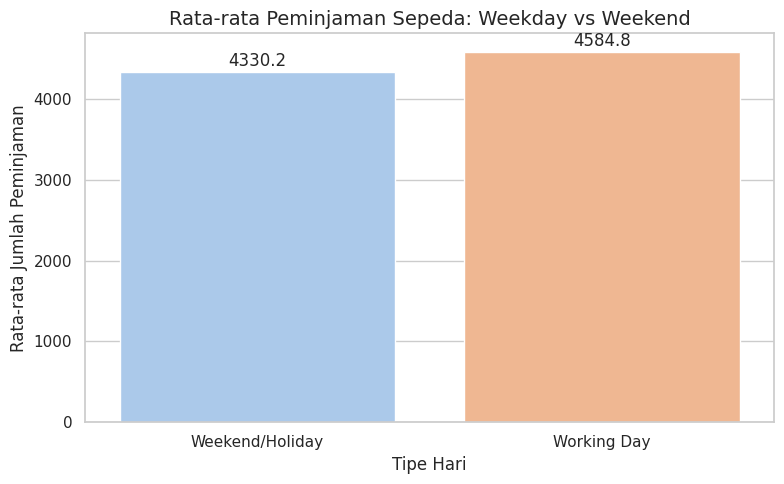

In [344]:
# Set style
sns.set(style="whitegrid")

# Buat plot
plt.figure(figsize=(8, 5))
bar = sns.barplot(
    x='day_type',
    y='total_mean',
    data=day_type_stats,
    palette='pastel'
)

# label di atas tiap batang
for p in bar.patches:
    bar.annotate(
        format(p.get_height(), '.1f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 8),
        textcoords = 'offset points'
    )

# Judul dan label
plt.title('Rata-rata Peminjaman Sepeda: Weekday vs Weekend', fontsize=14)
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.tight_layout()
plt.show()

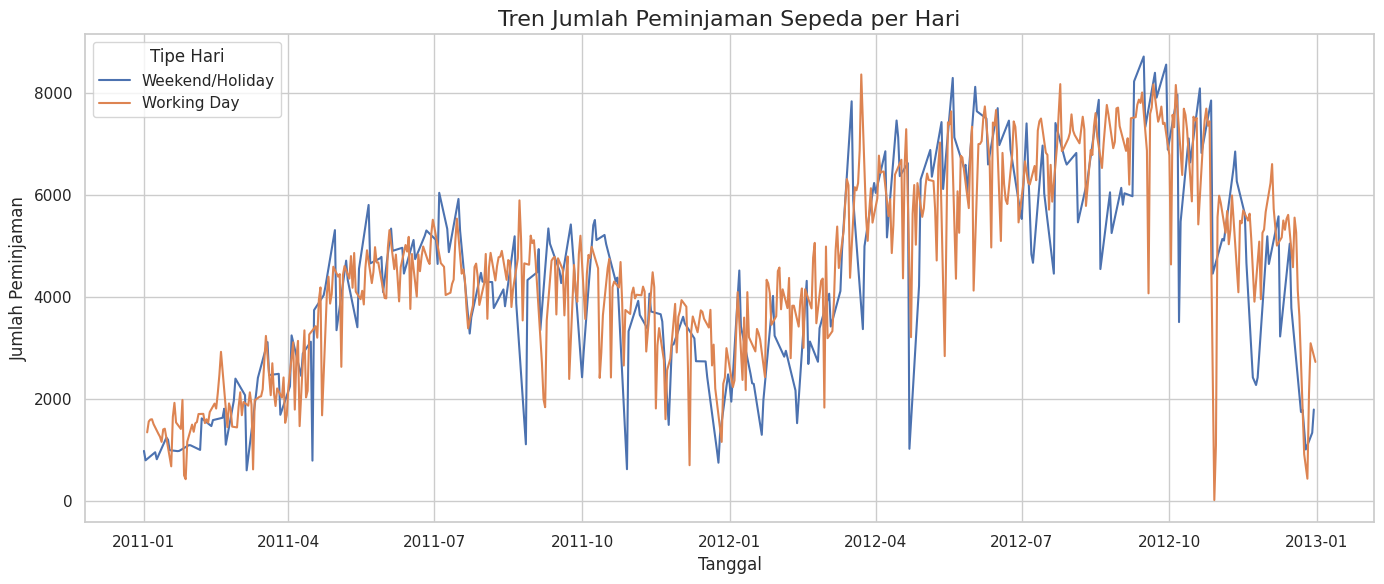

In [345]:
# Buat plot
plt.figure(figsize=(14, 6))

# Plot line per tipe hari
for day_type in day_df['day_type'].unique():
    subset = day_df[day_df['day_type'] == day_type]
    plt.plot(subset['date'], subset['cnt'], label=day_type)

# Labeling & style
plt.title('Tren Jumlah Peminjaman Sepeda per Hari', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Tipe Hari')
plt.grid(True)
plt.tight_layout()
plt.show()

**Inisight:**

- Total peminjaman jauh lebih besar di Working Day dibanding Weekend/Holiday
- Rata-rata per hari juga lebih tinggi pada hari kerja:
  - Working Day: ~4.585 sepeda/hari
  - Weekend/Holiday: ~4.330 sepeda/hari

  Menunjukkan bahwa sepeda digunakan secara konsisten dan lebih aktif saat hari kerja — kemungkinan untuk aktivitas rutin seperti kerja/sekolah.

- Tetapi, hari dengan peminjaman tertinggi secara absolut justru muncul di Weekend/Holiday dengan 8.714 peminjaman, yang menunjukkan potensi event/libur panjang yang meningkatkan peminjaman secara drastis.

### 2.     Pada jam berapa penggunaan sepeda paling tinggi di hari kerja dibanding akhir pekan?

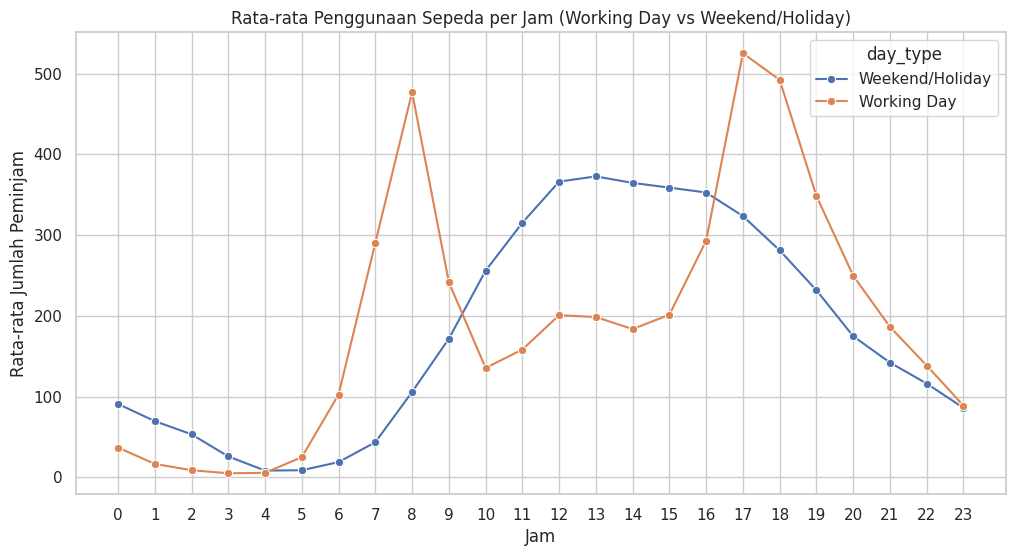

In [346]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_usage, x='hour', y='cnt', hue='day_type', marker='o')
plt.title('Rata-rata Penggunaan Sepeda per Jam (Working Day vs Weekend/Holiday)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

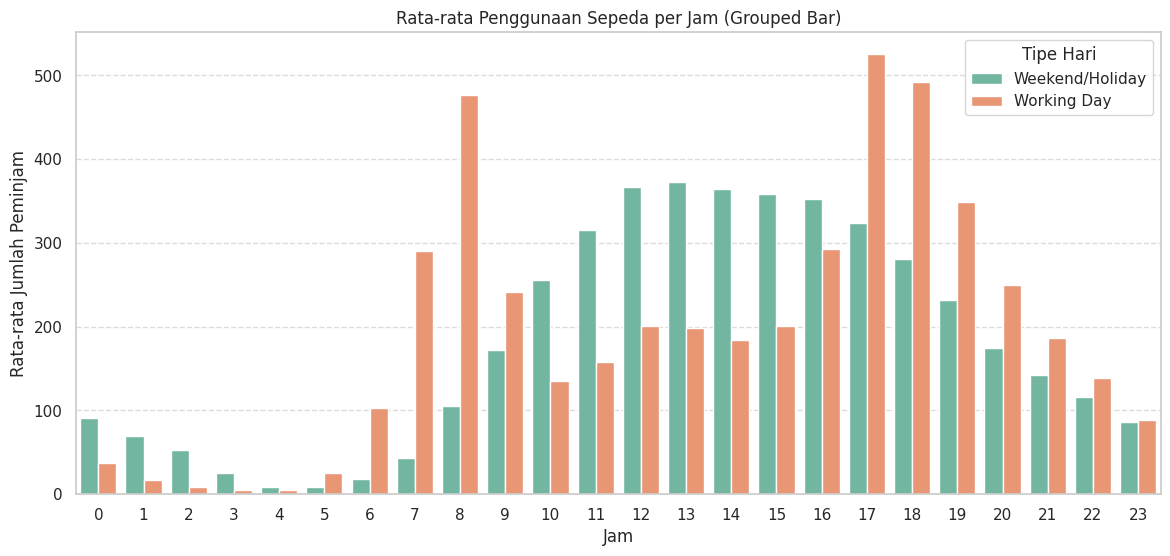

In [347]:
plt.figure(figsize=(14,6))
sns.barplot(data=hourly_usage, x='hour', y='cnt', hue='day_type', palette='Set2')
plt.title('Rata-rata Penggunaan Sepeda per Jam (Grouped Bar)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipe Hari')
plt.show()

**Insight:**

- Distribusi di hari kerja lebih lebar pada jam tertentu (terutama jam 8 dan 17), menunjukkan jam sibuk.
- Di akhir pekan, distribusi lebih merata dan konsisten dari siang ke sore, dengan nilai maksimum lebih rendah dibanding hari kerja.

### 3. Bagaimana intensitas dan waktu penggunaan sepeda berbeda antara hari kerja dan akhir pekan?

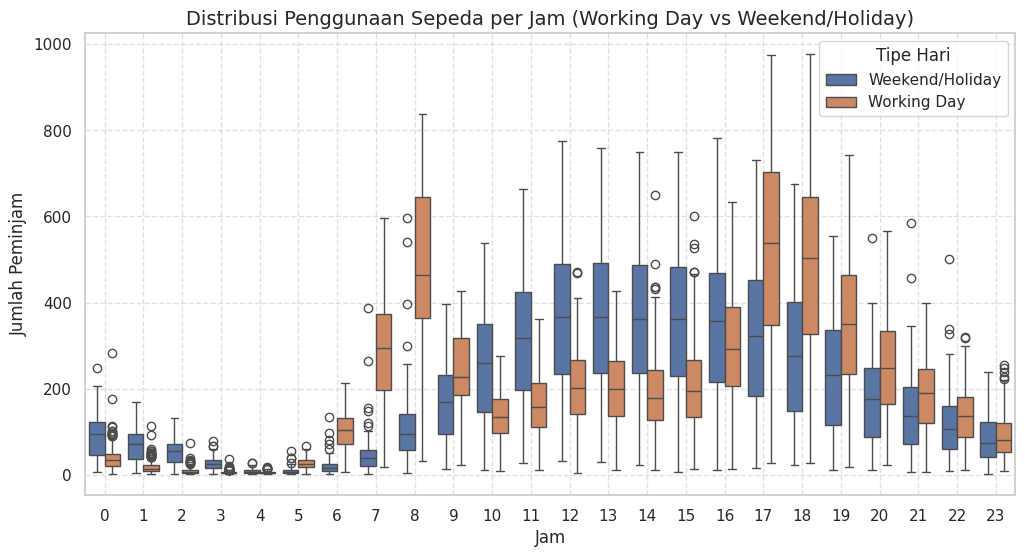

In [348]:
plt.figure(figsize=(12,6))
sns.boxplot(data=hour_df, x='hour', y='cnt', hue='day_type')
plt.title('Distribusi Penggunaan Sepeda per Jam (Working Day vs Weekend/Holiday)', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Peminjam', fontsize=12)
plt.legend(title='Tipe Hari')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0,24))
plt.show()

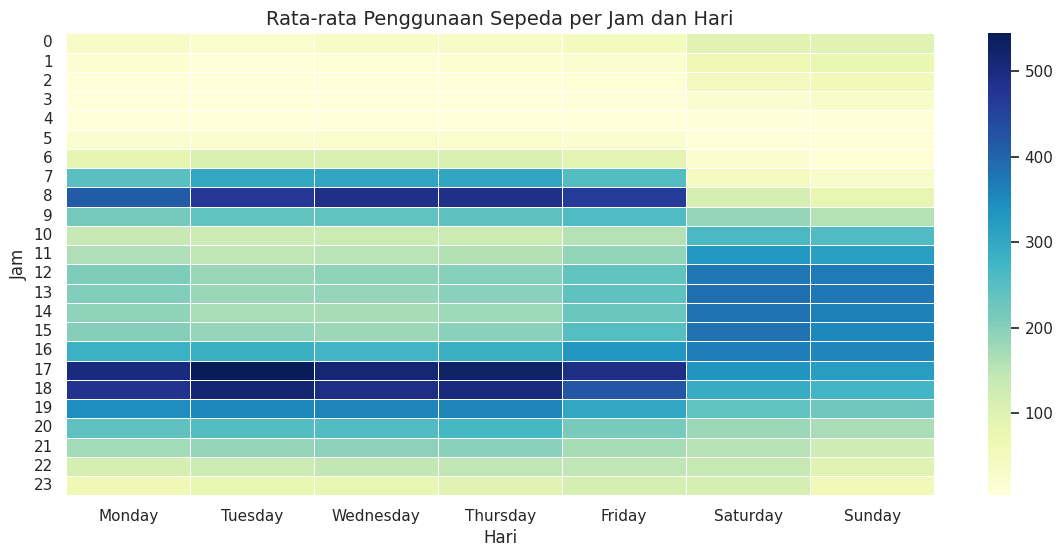

In [349]:
hour_df['day_name'] = pd.to_datetime(hour_df['date']).dt.day_name()

pivot = hour_df.pivot_table(index='hour', columns='day_name', values='cnt', aggfunc='mean')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot[ordered_days]

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title('Rata-rata Penggunaan Sepeda per Jam dan Hari', fontsize=14)
plt.xlabel('Hari')
plt.ylabel('Jam')
plt.show()

**Inisght:**

- Working Day memiliki dua puncak utama:
  1. Jam 08.00 → 477 peminjam (berangkat kerja/sekolah)
  2. Jam 17.00 → 525 peminjam (pulang kerja)

- Weekend/Holiday punya satu puncak utama:
  1. Jam 13.00 → 373 peminjam (rekreasional, siang hari)

- Distribusi waktu lebih tajam dan terfokus di jam sibuk pada hari kerja (pola commuting).
- Sebaliknya, pada akhir pekan, distribusinya lebih merata dan melandai dari pagi → siang → sore → malam.

## Analisis Lanjutan (Opsional)

In [350]:
# Step 1: Hitung total penggunaan per hari
rfm_df = hour_df.groupby('date')['cnt'].sum().reset_index()

# Step 2: Konversi 'date' ke datetime dan hitung recency
rfm_df['date'] = pd.to_datetime(rfm_df['date'])
last_date = rfm_df['date'].max()
rfm_df['recency'] = (last_date - rfm_df['date']).dt.days

# Step 3: Frequency dan Monetary kita samakan (jumlah peminjaman per hari)
rfm_df.rename(columns={'cnt': 'monetary'}, inplace=True)
rfm_df['frequency'] = rfm_df['monetary']  # karena dalam konteks ini mereka sama

# Normalisasi (opsional, buat plot lebih enak)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm_scaled = rfm_df[['recency', 'frequency', 'monetary']].copy()
rfm_scaled[['recency', 'frequency', 'monetary']] = scaler.fit_transform(rfm_scaled[['recency', 'frequency', 'monetary']])

rfm_df.head()

,date,monetary,recency,frequency
0,2011-01-01,985,730,985
1,2011-01-02,801,729,801
2,2011-01-03,1349,728,1349
3,2011-01-04,1562,727,1562
4,2011-01-05,1600,726,1600


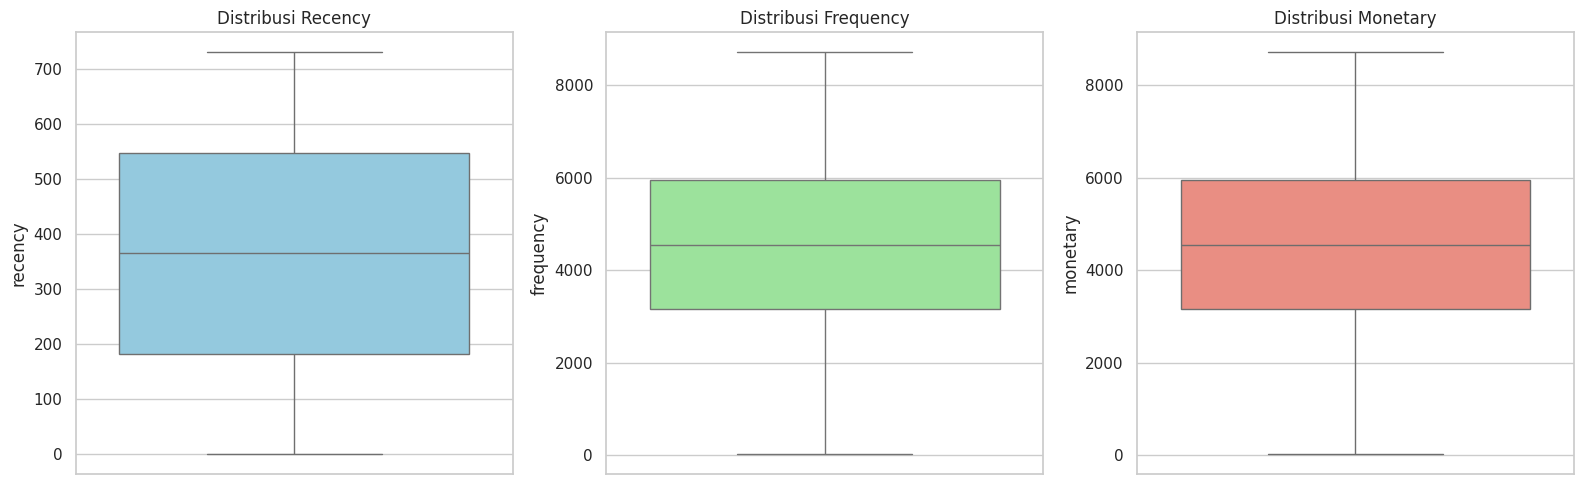

In [351]:
plt.figure(figsize=(16,5))

# Recency
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_df['recency'], color='skyblue')
plt.title('Distribusi Recency')

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_df['frequency'], color='lightgreen')
plt.title('Distribusi Frequency')

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_df['monetary'], color='salmon')
plt.title('Distribusi Monetary')

plt.tight_layout()
plt.show()

## Conclusion

**1. Perbandingan Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan**

- Hari kerja menyumbang proporsi peminjaman sepeda yang lebih besar (sekitar 2,29 juta) dibandingkan dengan akhir pekan/libur (sekitar 1 juta).
- Rata-rata peminjaman per hari juga sedikit lebih tinggi pada hari kerja (4.585 sepeda/hari) dibanding akhir pekan (4.330 sepeda/hari).
- Hari kerja menunjukkan pola penggunaan yang lebih stabil, sementara akhir pekan cenderung memiliki fluktuasi tinggi.
- Hari dengan peminjaman tertinggi justru jatuh pada akhir pekan/libur, mengindikasikan ada hari-hari spesial dengan lonjakan aktivitas (misalnya long weekend atau hari besar nasional).

**2. Penggunaan sepeda berbeda signifikan dari sisi waktu tergantung jenis harinya:**
- Working Day menunjukkan dua lonjakan besar yang selaras dengan aktivitas harian masyarakat, yaitu:
    - Jam 08:00 (berangkat kerja/sekolah)
    - Jam 17:00 (pulang kerja)
- Weekend/Holiday memiliki pola satu puncak utama di siang hari (jam 13:00), mengindikasikan aktivitas rekreasi atau olahraga.
- Ini menegaskan bahwa fungsi peminjaman sepeda di weekdays dan weekend berbeda tujuan:
    - Weekdays → fungsi transportasi rutin
    - Weekends → fungsi hiburan dan olahraga

**3. Perbedaan Intensitas dan Pola Waktu Penggunaan**

- Rata-rata per jam, penggunaan lebih tinggi di hari kerja (193 pengguna/jam) dibanding akhir pekan (181 pengguna/jam).
- Volume total pun lebih besar pada hari kerja karena jumlah hari kerja yang memang lebih banyak.
- Grafik distribusi waktu memperlihatkan perbedaan pola signifikan antara hari kerja dan akhir pekan:
    - Hari kerja punya dua puncak (jam sibuk pagi & sore).
    - Akhir pekan cenderung memiliki satu puncak di siang hari.

In [352]:
hour_df.to_csv("main_data.csv", index=False)